<a href="https://colab.research.google.com/github/ninkanatalia04/SistemKeamananCerdas/blob/main/RoBERTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSIDER THREAT USING TRANSFORMERS ON USER ACTIVITY LOGS**

**Topik Riset:**

"Deteksi Ancaman Internal Menggunakan Transformer untuk Menganalisis Log Aktivitas Pengguna"

**Deskripsi:**

Transformer digunakan untuk menganalisis aktivitas pengguna secara menyeluruh. Model ini dilatih untuk mendeteksi pola akses yang tidak biasa oleh pengguna internal, seperti akses data di luar jam kerja atau aktivitas mencurigakan lainnya, dengan mempelajari urutan akses file dan sistem.

**Novelty:**

Sedang hingga tinggi. Insider threat sudah menjadi fokus penelitian dengan berbagai metode deteksi perilaku anomali. Namun, Transformer, dengan kemampuannya untuk menangkap perubahan perilaku yang halus dalam urutan log, menawarkan pendekatan baru yang dapat meningkatkan performa deteksi.


**Dataset: CERT Insider threat**

Dataset ini berisi data aktivitas pengguna yang mencurigakan dan bisa digunakan untuk mendeteksi Insider Threat. Model Transformer bisa mengenali pola akses yang anomali berdasarkan log pengguna.

URL: https://www.kaggle.com/datasets/nitishabharathi/cert-insider-threat


# **Importing Modules and Libraries**

In [ ]:
%pip install transformers tensorflow scikit-learn matplotlib pandas pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# **Importing Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
# Membaca file CSV langsung dari path
data = pd.read_csv("/content/gdrive/My Drive/SKC/email.csv")

# Melihat beberapa baris pertama untuk memastikan data terbaca dengan benar
print(data.head(n=5))

                         id                 date     user       pc  \
0  {R3I7-S4TX96FG-8219JWFF}  01/02/2010 07:11:45  LAP0338  PC-5758   
1  {R0R9-E4GL59IK-2907OSWJ}  01/02/2010 07:12:16  MOH0273  PC-6699   
2  {G2B2-A8XY58CP-2847ZJZL}  01/02/2010 07:13:00  LAP0338  PC-5758   
3  {A3A9-F4TH89AA-8318GFGK}  01/02/2010 07:13:17  LAP0338  PC-5758   
4  {E8B7-C8FZ88UF-2946RUQQ}  01/02/2010 07:13:28  MOH0273  PC-6699   

                                                  to  \
0  Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...   
1                        Odonnell-Gage@bellsouth.net   
2                         Penelope_Colon@netzero.com   
3                          Judith_Hayden@comcast.net   
4  Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...   

                                cc                          bcc  \
0  Nathaniel.Hunter.Heath@dtaa.com                          NaN   
1                              NaN                          NaN   
2                              NaN       

In [ ]:
data = pd.read_csv('email.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'email.csv'

In [ ]:
data.head(n=5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629979 entries, 0 to 2629978
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   date         object
 2   user         object
 3   pc           object
 4   to           object
 5   cc           object
 6   bcc          object
 7   from         object
 8   size         int64 
 9   attachments  int64 
 10  content      object
dtypes: int64(2), object(9)
memory usage: 220.7+ MB


In [ ]:
# Assume data is read from csic_database.csv
# If so then correct the variable to data and not csic_data
data = pd.read_csv("/content/gdrive/My Drive/SKC/email.csv")

n_features = data.shape[1] #Change csic_data to data
n_samples = data.shape[0]  #Change csic_data to data


print("Number of samples:", n_samples)
print("Number of features:", n_features)

Number of samples: 2629979
Number of features: 11


In [ ]:
data.tail()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
2629974,{L7U1-S3KK01XW-3123TPUC},05/16/2011 20:54:18,HRL0540,PC-1117,Hadley.Willa.Hill@dtaa.com;Tarik.Linus.Hubbard...,Hedwig.Regina.Livingston@dtaa.com,NaN,Hedwig.Regina.Livingston@dtaa.com,33088,0,history designed stephen degree ignore them ad...
2629975,{Q4Y3-X9HV77CL-3290SOZH},05/16/2011 20:54:43,LAF0991,PC-4973,Hu.Akeem.Vincent@dtaa.com,Brianna.Rebecca.Mcintyre@dtaa.com;Kermit.Coby....,NaN,Lucas.Ahmed.Ferrell@dtaa.com,33249,1,prince prince ahmose ahmose ankh prince prince...
2629976,{L6B7-F7RU89CD-0355JGGE},05/16/2011 21:08:12,LAF0991,PC-4973,Doyle.Grant@netzero.com;HAV856@charter.net,NaN,NaN,Ferrell.Lucas@sbcglobal.net,41336,1,lifted documents 65 declined revival 14 unprec...
2629977,{F4R9-W0OQ41HB-0157JSUE},05/16/2011 21:15:35,JMW0638,PC-1397,Eagan.Zephania.Talley@dtaa.com,NaN,NaN,Jonah.Merritt.Wilder@dtaa.com,39908,0,their official holmes face arranged among priz...
2629978,{O8D9-S1AR98KA-2325CRWF},05/16/2011 21:16:26,BCM0653,PC-5717,VLB5@cox.net,Noel_Foster@netzero.com,NaN,BCM6@cox.net,26412,0,most originally beautiful body word mind right...


In [ ]:
data.columns

Index(['id', 'date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'size',
       'attachments', 'content'],
      dtype='object')

##Mengatasi missing value

In [ ]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y %H:%M:%S')

# Check for missing values
missing_values = data.isnull().sum()

# Basic statistics and info
data_info = data.describe()
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629979 entries, 0 to 2629978
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   date         datetime64[ns]
 2   user         object        
 3   pc           object        
 4   to           object        
 5   cc           object        
 6   bcc          object        
 7   from         object        
 8   size         int64         
 9   attachments  int64         
 10  content      object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 220.7+ MB


In [ ]:
# Exploratory Data Analysis
# Volume of emails sent over time
email_volume = data.groupby(data['date'].dt.date).size()

# Frequency of emails by user
user_frequency = data['user'].value_counts()

# Number of attachments analysis
attachment_analysis = data['attachments'].value_counts()

# Display results
print("Missing Values:\n", missing_values)

Missing Values:
 id                   0
date                 0
user                 0
pc                   0
to                   0
cc             1617054
bcc            2212977
from                 0
size                 0
attachments          0
content              0
dtype: int64


In [ ]:
data.isnull().sum()

,0
id,0
date,0
user,0
pc,0
to,0
cc,1617054
bcc,2212977
from,0
size,0
attachments,0


In [ ]:
data.shape

(2629979, 11)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(147299, 11)

In [ ]:
print("Data Info:\n", data_info)

Data Info:
 None


In [ ]:
print("Email Volume Over Time:\n", email_volume)

Email Volume Over Time:
 date
2010-01-02     350
2010-01-03     390
2010-01-04    7912
2010-01-05    7861
2010-01-06    7924
              ... 
2011-05-12    6797
2011-05-13    6723
2011-05-14     321
2011-05-15     319
2011-05-16    6761
Length: 500, dtype: int64


In [ ]:
print("User Frequency:\n", user_frequency)

User Frequency:
 user
MSS0001    12034
KBP0008     9145
HTH0007     9116
HCS0003     9097
KWC0004     8997
           ...  
DAR0885      109
MTT0901       82
JRH0455       51
LPH0572       36
EAH0466       34
Name: count, Length: 1000, dtype: int64


In [ ]:
print("Attachment Analysis:\n", attachment_analysis)

Attachment Analysis:
 attachments
0    2066683
1     332335
2     122620
3      46157
4      23450
5      13316
6       8800
7       6515
9       5794
8       4309
Name: count, dtype: int64


# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y %H:%M:%S')

# Handle missing values in 'cc' and 'bcc'
data['cc'] = data['cc'].fillna('')
data['bcc'] = data['bcc'].fillna('')

In [ ]:
# Feature Engineering
data['num_recipients'] = data['to'].str.count(';') + data['cc'].str.count(';') + data['bcc'].str.count(';') + 1
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek

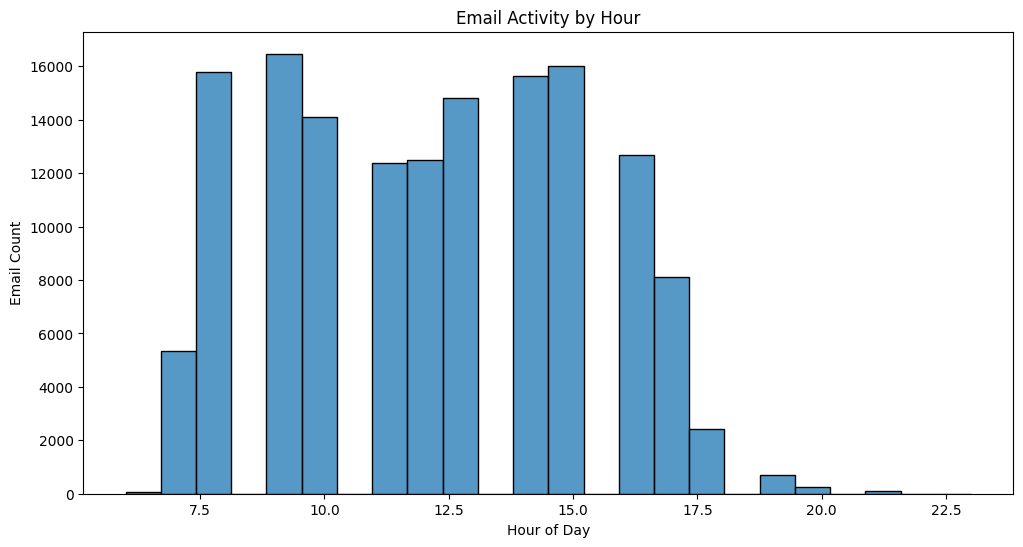

In [ ]:
# Time-based Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['hour'], bins=24, kde=False)
plt.title('Email Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Email Count')
plt.show()

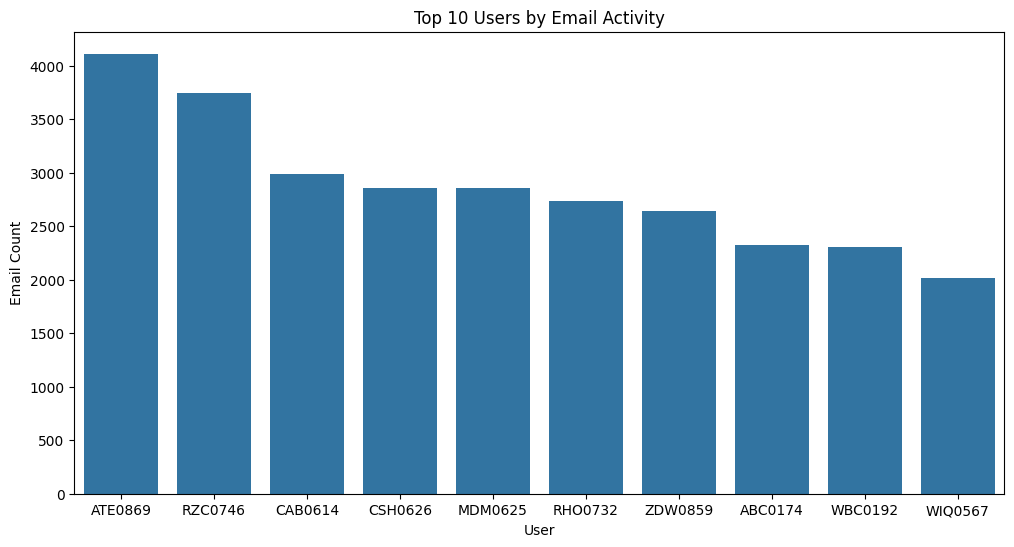

In [ ]:
# User-based Analysis
top_users = data['user'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title('Top 10 Users by Email Activity')
plt.xlabel('User')
plt.ylabel('Email Count')
plt.show()

In [ ]:
# Prepare data for anomaly detection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

features = ['size', 'attachments', 'num_recipients', 'hour', 'day_of_week']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(X_scaled)

# Analyze anomalies
anomalies = data[data['anomaly'] == -1]

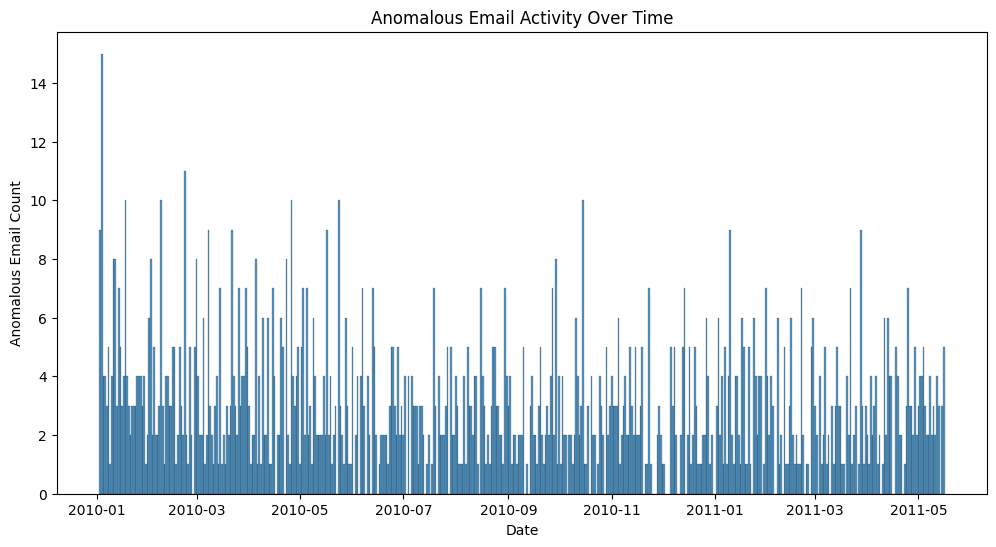

Number of Anomalies Detected: 1472


In [ ]:
# Plot anomalies over time
plt.figure(figsize=(12, 6))
sns.histplot(anomalies['date'].dt.date, bins=30, kde=False)
plt.title('Anomalous Email Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Anomalous Email Count')
plt.show()

print(f"Number of Anomalies Detected: {len(anomalies)}")

# **Pre-processing**

In [ ]:
# Sample 10% of your data
data_sample = data.sample(frac=0.1, random_state=42)

In [ ]:
# Continue with your preprocessing
data_sample['date'] = pd.to_datetime(data_sample['date'], format='%m/%d/%Y %H:%M:%S')
data_sample['cc'] = data_sample['cc'].fillna('')
data_sample['bcc'] = data_sample['bcc'].fillna('')

data_sample['num_recipients'] = data_sample['to'].str.count(';') + data_sample['cc'].str.count(';') + data_sample['bcc'].str.count(';') + 1
data_sample['hour'] = data_sample['date'].dt.hour
data_sample['day_of_week'] = data_sample['date'].dt.dayofweek

In [ ]:
# Import the necessary module
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize content using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
content_tfidf = tfidf.fit_transform(data_sample['content']).toarray()
content_tfidf_df = pd.DataFrame(content_tfidf, columns=tfidf.get_feature_names_out())

In [ ]:
# Combine numeric features with TF-IDF features
features = ['size', 'attachments', 'num_recipients', 'hour', 'day_of_week']
X_numeric = data_sample[features]
X = pd.concat([X_numeric.reset_index(drop=True), content_tfidf_df.reset_index(drop=True)], axis=1)

In [ ]:
# Standardize numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
X_scaled = pd.concat([pd.DataFrame(X_numeric_scaled, columns=features).reset_index(drop=True), content_tfidf_df.reset_index(drop=True)], axis=1)

In [ ]:
# Use IsolationForest to detect anomalies and create the 'anomaly' column
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
data_sample['anomaly'] = model.fit_predict(X_scaled)
data_sample['anomaly'] = data_sample['anomaly'].map({1: 0, -1: 1})  # Convert from {1, -1} to {0, 1}

In [ ]:
# Split the data
y = data_sample['anomaly']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
data_sample

,id,date,user,pc,to,cc,bcc,from,size,attachments,content,num_recipients,hour,day_of_week,anomaly
723653,{K7K7-N4QE22AC-1293WQOY},2010-05-10 18:19:24,GTD0116,PC-5312,Lucas.Ahmed.Ferrell@dtaa.com;Rachel.Hermione.L...,Clio.Ocean.Faulkner@dtaa.com;Kermit.Coby.Olive...,Byron.Tyrone.Williamson@dtaa.com,Grant.Tyrone.Doyle@dtaa.com,22253,1,product place similar zahir proposal single la...,4,18,0,0
1021280,{A7T6-P8IA96ZR-3766ETBG},2010-07-02 15:10:44,CCH0685,PC-7039,Reece.Nicolas.Lopez@dtaa.com,Cole.Aaron.Mcfarland@dtaa.com;Wade.Ira.Frazier...,Cora.Clementine.Higgins@dtaa.com,Cora.Clementine.Higgins@dtaa.com,31913,1,kings branch council scheme effort metropolita...,2,15,4,0
2050466,{E9K3-B9MG57PX-8236JTQO},2011-01-19 15:10:55,HVB0037,PC-7979,Colin.E.Brown@bellsouth.net,Whoopi.B.Camacho@aol.com;Clinton-Wolfe@netzero...,Hollee_Becker@hotmail.com,Hollee_Becker@hotmail.com,38035,2,president honour leather multiple 0530 killed ...,2,15,2,0
1093408,{G5M3-E2JN25NG-4958EFKQ},2010-07-16 16:31:19,KWE0082,PC-1933,Hayes_Hector@earthlink.net,Glass-Matthew@aol.com,Eaton-Kane@verizon.net,Eaton-Kane@verizon.net,33007,0,seventh anniversary 50 married throughout jaso...,1,16,4,0
2454123,{O0O0-F6AX57UP-7912JCPT},2011-04-08 15:35:15,TSR0676,PC-9227,Orla.Ruth.Mckenzie@dtaa.com,Ira.Benjamin.Mays@dtaa.com,Todd.Scott.Roth@dtaa.com,Todd.Scott.Roth@dtaa.com,52132,0,edwards desire get referring disliking additio...,1,15,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56648,{N6H4-U2OI40TM-6514RGHI},2010-01-12 17:29:02,OCS0865,PC-8309,Candice.Lunea.Fischer@dtaa.com,Hashim.Damon.Dudley@dtaa.com;Roary.Ursa.Massey...,Oren.Clinton.Sharpe@dtaa.com,Oren.Clinton.Sharpe@dtaa.com,24009,2,gang jim contrast ensuing born fired insanity ...,2,17,1,0
535940,{V5J5-B6NO89TU-1118TLPP},2010-04-07 11:56:29,CTA0020,PC-3118,Mark.Yardley.Dunlap@dtaa.com,Curran.Tarik.Ayala@dtaa.com,Bethany.Xerxes.Johnson@dtaa.com,Curran.Tarik.Ayala@dtaa.com,27505,0,13 told figures billy significant hopes key ha...,1,11,2,0
785378,{X1J0-Z8OQ50KL-8631SPEN},2010-05-20 15:47:30,MCD0125,PC-7295,Hedy_Lopez@bellsouth.net,Walton-Elvis@cox.net,MCD9@gmail.com,MCD9@gmail.com,47074,0,immigrants head 113 best me scrum stopped had ...,1,15,3,0
2196983,{V5R1-R7XV33NW-7537CNFR},2011-02-17 10:23:56,WIQ0567,PC-6113,CEL7817@comcast.net,Stephanie.B.Harrington@netzero.com,Willow_Quinn@gmail.com,Willow_Quinn@gmail.com,42272,0,73 san poll switched early fan club 25 onto su...,1,10,3,0


# **Training**

**TRANSFORMER**

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from google.colab import drive
from tqdm import tqdm  # Untuk progress bar
from torch.cuda.amp import autocast, GradScaler  # Untuk Mixed Precision Training

# 1. Mount Google Drive
drive.mount('/content/gdrive')

# 2. Load Dataset langsung dari Google Drive
file_path = "/content/gdrive/My Drive/SKC/email.csv"
data = pd.read_csv(file_path)

# 3. Mengambil subset dari data (10%) untuk mempercepat proses
data_sample = data.sample(frac=0.1, random_state=42)  # Ambil 10% dari data
if 'content' in data_sample.columns:
    data_sample['LABEL'] = (data_sample.index % 2).astype(int)  # Label dummy untuk contoh
    log_entries = data_sample['content'].tolist()
    labels = data_sample['LABEL'].tolist()
else:
    print("Kolom 'content' tidak ditemukan dalam dataset.")
    raise ValueError("Kolom 'content' tidak ditemukan.")

# 4. Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(log_entries, labels, test_size=0.2, random_state=42)

# 5. Define Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):  # Mengurangi max_len untuk percepatan
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenize text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 6. Load Tokenizer dan Model yang Lebih Ringan (DistilRoBERTa)
tokenizer_roberta = RobertaTokenizer.from_pretrained('distilroberta-base')
model_roberta = DistilBertForSequenceClassification.from_pretrained('distilroberta-base', num_labels=2)

# Move model to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_roberta.to(device)

# 7. Prepare DataLoader dengan Batch Size Lebih Kecil
train_dataset = CustomDataset(X_train, y_train, tokenizer_roberta)
test_dataset = CustomDataset(X_test, y_test, tokenizer_roberta)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Batch size yang lebih kecil
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# 8. Setup Optimizer dan Mixed Precision Training
optimizer = torch.optim.AdamW(model_roberta.parameters(), lr=1e-5)
scaler = GradScaler()  # Untuk mixed precision

# Training Loop dengan AMP dan Progress Bar
epochs = 3
model_roberta.train()

for epoch in range(epochs):
    total_loss = 0
    model_roberta.train()

    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for step, batch in enumerate(train_loader):
            optimizer.zero_grad()

            # Memastikan semua data berada di perangkat yang sama
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Mixed Precision dengan autocast
            try:
                with autocast():
                    outputs = model_roberta(input_ids, attention_mask=attention_mask, labels=labels)
                    loss = outputs.loss
            except RuntimeError as e:
                print(f"Runtime error: {e}")
                print("Skipping this batch to prevent loop hang.")
                continue  # Skip batch if there's an error

            # Backward pass dengan scaler
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            total_loss += loss.item()
            pbar.set_postfix({'batch_loss': loss.item()})
            pbar.update(1)

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1} - Average Loss: {avg_loss:.4f}")

    # Bersihkan cache GPU setiap epoch untuk menghindari akumulasi memori
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print("Training complete!")

# 9. Evaluation on Test Data
model_roberta.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_roberta(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = labels.cpu().numpy()

        predictions.extend(preds)
        true_labels.extend(labels)

# 10. Calculate Metrics
accuracy = accuracy_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

# Confusion matrix untuk Specificity
tn, fp, fn, tp = confusion_matrix(true_labels, predictions).ravel()
specificity = tn / (tn + fp)

# 11. Print Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.0.attention.k_

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import os

# 1. Load Dataset
file_name = 'email.csv'

# Cek apakah file ada di direktori saat ini
if os.path.exists(file_name):
    print(f"File '{file_name}' ditemukan!")
    data = pd.read_csv(file_name)
else:
    print(f"File '{file_name}' tidak ditemukan. Unggah file jika menggunakan Google Colab.")

    # Untuk Google Colab: uncomment jika Anda ingin mengunggah file
    from google.colab import files
    uploaded = files.upload()
    data = pd.read_csv('email.csv')  # Ulangi pembacaan setelah upload

# Pastikan ada kolom 'content' untuk analisis
if 'content' in data.columns:
    # Membuat label dummy untuk tujuan contoh
    data['LABEL'] = (data.index % 2).astype(int)  # Label dummy: 0 dan 1 secara bergantian
    log_entries = data['content'].tolist()
    labels = data['LABEL'].tolist()
else:
    print("Kolom 'content' tidak ditemukan dalam dataset. Pastikan dataset memiliki kolom ini.")
    raise ValueError("Kolom 'content' tidak ditemukan.")

# 2. Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(log_entries, labels, test_size=0.2, random_state=42)

# 3. Define Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenize text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 4. Load Tokenizer and Model
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')
model_roberta = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)  # Dua label (0 dan 1)

# Move model to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_roberta.to(device)

# 5. Prepare DataLoader
train_dataset = CustomDataset(X_train, y_train, tokenizer_roberta)
test_dataset = CustomDataset(X_test, y_test, tokenizer_roberta)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 6. Training the Model
optimizer = torch.optim.AdamW(model_roberta.parameters(), lr=1e-5)

# Mengaktifkan mode pelatihan
model_roberta.train()

for epoch in range(3):  # 3 epochs
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_roberta(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1} - Loss: {avg_loss:.4f}")

print("Training complete!")

# 7. Evaluation on Test Data
model_roberta.eval()
predictions = []
true_labels = []

# Disable gradient calculation during inference
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_roberta(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = labels.cpu().numpy()

        predictions.extend(preds)
        true_labels.extend(labels)

# 8. Calculate Metrics
accuracy = accuracy_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)  # Sensitivity
precision = precision_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

# Confusion matrix to calculate specificity
tn, fp, fn, tp = confusion_matrix(true_labels, predictions).ravel()
specificity = tn / (tn + fp)

# 9. Print Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# CLASSIFICATION Non-Tuning

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import RobertaTokenizer, RobertaModel  # Import RoBERTa

# 1. Load data
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik5_DDoS Attack Detection Using Transformer/dataset/Binary_Class_Balanced_Dataset_4Lac_60_Features.csv')

# 2. Preprocessing: Label Encoding
le1 = LabelEncoder()
data['label'] = le1.fit_transform(data['Label'])  # Ganti 'Label' sesuai dengan nama kolom asli
class_names = le1.classes_

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 3. Define RoBERTa Model
class RoBERTaModel(nn.Module):
    def __init__(self, num_classes):
        super(RoBERTaModel, self).__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')  # Load pre-trained RoBERTa model
        self.fc = nn.Linear(self.roberta.config.hidden_size, num_classes)  # Output layer

    def forward(self, x):
        # Use RoBERTa's embeddings
        outputs = self.roberta(x, return_dict=True)
        hidden_states = outputs.last_hidden_state
        pooled_output = hidden_states.mean(dim=1)  # Average pooling
        return self.fc(pooled_output)  # Final output

# 4. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

# Initialize RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

for fold, (train_index, val_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = data.drop(columns=['label']).iloc[train_index], data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = data['label'].iloc[train_index], data['label'].iloc[val_index]

    # Tokenization
    train_encodings = tokenizer(X_train.astype(str).tolist(), truncation=True, padding=True, return_tensors='pt')
    val_encodings = tokenizer(X_val.astype(str).tolist(), truncation=True, padding=True, return_tensors='pt')

    # Convert to PyTorch tensors
    y_train_tensor = torch.LongTensor(y_train.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = RoBERTaModel(num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, masks, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)  # Call model with input ids
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_inputs = val_encodings['input_ids']
            val_masks = val_encodings['attention_mask']
            y_pred_probs = model(val_inputs)  # Use input ids for validation
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 7. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 8. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# Hyperparameter Tuning

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import RobertaTokenizer, RobertaModel
import optuna  # Import Optuna

# 1. Load data
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik5_DDoS Attack Detection Using Transformer/dataset/Binary_Class_Balanced_Dataset_4Lac_60_Features.csv')

# 2. Preprocessing: Label Encoding
le1 = LabelEncoder()
data['label'] = le1.fit_transform(data['Label'])  # Ganti 'Label' sesuai dengan nama kolom asli
class_names = le1.classes_

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 3. Define RoBERTa Model
class RoBERTaModel(nn.Module):
    def __init__(self, num_classes):
        super(RoBERTaModel, self).__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')  # Load pre-trained RoBERTa model
        self.fc = nn.Linear(self.roberta.config.hidden_size, num_classes)  # Output layer

    def forward(self, x):
        # Use RoBERTa's embeddings
        outputs = self.roberta(x, return_dict=True)
        hidden_states = outputs.last_hidden_state
        pooled_output = hidden_states.mean(dim=1)  # Average pooling
        return self.fc(pooled_output)  # Final output

# 4. Define Objective Function for Optuna
def objective(trial):
    # Hyperparameters
    batch_size = trial.suggest_int('batch_size', 8, 32)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)

    # KFold Cross-Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=50)
    all_accuracy = []

    # Initialize RoBERTa tokenizer
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

    for fold, (train_index, val_index) in enumerate(kf.split(data)):
        print(f'Fold {fold + 1}')

        # Split data
        X_train, X_val = data.drop(columns=['label']).iloc[train_index], data.drop(columns=['label']).iloc[val_index]
        y_train, y_val = data['label'].iloc[train_index], data['label'].iloc[val_index]

        # Tokenization
        train_encodings = tokenizer(X_train.astype(str).tolist(), truncation=True, padding=True, return_tensors='pt')
        val_encodings = tokenizer(X_val.astype(str).tolist(), truncation=True, padding=True, return_tensors='pt')

        # Convert to PyTorch tensors
        y_train_tensor = torch.LongTensor(y_train.values)
        y_val_tensor = torch.LongTensor(y_val.values)

        # Create DataLoader
        train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # Initialize the model
        model = RoBERTaModel(num_classes=len(class_names))
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        # Train the model
        num_epochs = 3  # Shorter for tuning
        for epoch in range(num_epochs):
            model.train()
            for inputs, masks, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)  # Call model with input ids
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_inputs = val_encodings['input_ids']
            val_masks = val_encodings['attention_mask']
            y_pred_probs = model(val_inputs)  # Use input ids for validation
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        all_accuracy.append(accuracy)

    return np.mean(all_accuracy)  # Return mean accuracy across folds

# 5. Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Adjust the number of trials as needed

# 6. Print the best hyperparameters
print("Best hyperparameters:")
print(study.best_params)

# 7. Train final model with best hyperparameters
best_params = study.best_params
final_model = RoBERTaModel(num_classes=len(class_names))
final_model.train()
final_optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])

# Final training using all data with best hyperparameters
final_train_encodings = tokenizer(data.drop(columns=['label']).astype(str).tolist(), truncation=True, padding=True, return_tensors='pt')
final_y_tensor = torch.LongTensor(data['label'].values)
final_dataset = TensorDataset(final_train_encodings['input_ids'], final_train_encodings['attention_mask'], final_y_tensor)
final_loader = DataLoader(final_dataset, batch_size=best_params['batch_size'], shuffle=True)

num_epochs = 5  # Final training epochs
for epoch in range(num_epochs):
    final_model.train()
    for inputs, masks, labels in final_loader:
        final_optimizer.zero_grad()
        outputs = final_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        final_optimizer.step()

# You can proceed with validation and performance evaluation after training with the best hyperparameters


# CLASSIFICATION With Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import RobertaTokenizer, RobertaModel  # Import RoBERTa

# 1. Load data
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/template/Topik5_DDoS Attack Detection Using Transformer/dataset/Binary_Class_Balanced_Dataset_4Lac_60_Features.csv')

# 2. Preprocessing: Label Encoding
le1 = LabelEncoder()
data['label'] = le1.fit_transform(data['Label'])  # Ganti 'Label' sesuai dengan nama kolom asli
class_names = le1.classes_

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 3. Define RoBERTa Model
class RoBERTaModel(nn.Module):
    def __init__(self, num_classes):
        super(RoBERTaModel, self).__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')  # Load pre-trained RoBERTa model
        self.fc = nn.Linear(self.roberta.config.hidden_size, num_classes)  # Output layer

    def forward(self, x):
        # Use RoBERTa's embeddings
        outputs = self.roberta(x, return_dict=True)
        hidden_states = outputs.last_hidden_state
        pooled_output = hidden_states.mean(dim=1)  # Average pooling
        return self.fc(pooled_output)  # Final output

# 4. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

# Initialize RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

for fold, (train_index, val_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = data.drop(columns=['label']).iloc[train_index], data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = data['label'].iloc[train_index], data['label'].iloc[val_index]

    # Tokenization
    train_encodings = tokenizer(X_train.astype(str).tolist(), truncation=True, padding=True, return_tensors='pt')
    val_encodings = tokenizer(X_val.astype(str).tolist(), truncation=True, padding=True, return_tensors='pt')

    # Convert to PyTorch tensors
    y_train_tensor = torch.LongTensor(y_train.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = RoBERTaModel(num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, masks, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)  # Call model with input ids
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_inputs = val_encodings['input_ids']
            val_masks = val_encodings['attention_mask']
            y_pred_probs = model(val_inputs)  # Use input ids for validation
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 7. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 8. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Ganti dengan model yang Anda pilih
from sklearn.metrics import classification_report, accuracy_score

# 1. Melatih Model
model = RandomForestClassifier(random_state=50)  # Ganti dengan model yang Anda gunakan
model.fit(X_train_bin, y_train_bin)

# 2. Melakukan Prediksi pada Data Uji
y_pred_bin = model.predict(X_test_bin)

# 3. Evaluasi Model
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print(f'Akurasi: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test_bin, y_pred_bin))